 ### <a style ="color:#35cd36" > Abdesslem Oumayma   3Dni Groupe 2  $$2020-2021$$ </a>

# <center style="color:#cd3635">*** Compte rendu TP3 Linear Regression ***</center>

## <p style = "color:#3635cd"> Exercice 1</p>

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [168]:
abdesslem_oumayma= pd.read_csv('grav.csv')
print("shape:", abdesslem_oumayma.shape)
abdesslem_oumayma.head()

shape: (7, 2)


,height,seconds squared
0,100,8.967
1,120,11.989
2,150,15.852
3,180,16.991
4,200,20.284


In [169]:
abdesslem_oumayma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   height           7 non-null      int64  
 1   seconds squared  7 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 240.0 bytes


(7,)
(7,)


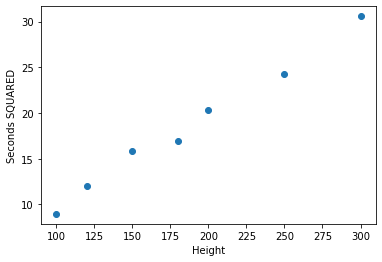

In [170]:
x= abdesslem_oumayma['height']
y= abdesslem_oumayma['seconds squared']
print(x.shape)
print(y.shape)
plt.scatter(x,y)
plt.xlabel("Height")
plt.ylabel("Seconds SQUARED")
plt.show()

In [171]:
np.corrcoef(x,y)

array([[1.        , 0.99473243],
       [0.99473243, 1.        ]])

In [172]:
from scipy import stats
stats.linregress(x,y)

LinregressResult(slope=0.10280912511759172, intercept=-0.6801232361241745, rvalue=0.9947324344135698, pvalue=3.857021649169523e-06, stderr=0.004737919558962453)

In [173]:
1/0.1028


9.727626459143968

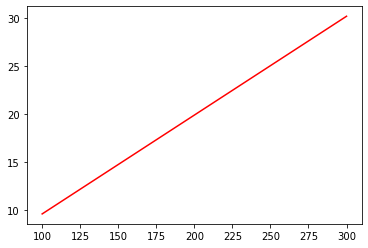

In [174]:
from scipy import stats
slope,intercept,r_value,p_value,std_error=stats.linregress(x,y)
def predict(x):
    return slope*x+intercept
fit = predict(x)
plt.plot(x,fit,c='r')
plt.show()

In [175]:
from sklearn.linear_model import LogisticRegression
LogisticRegression().get_params() 


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## <p style = "color:#3635cd"> Exercice 2 </p>

In [176]:
data= pd.read_csv('test_scores.csv')
print("shape:", data.shape)
data.head()

shape: (2133, 11)


,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,1.0,2.0,6OL,0.0,20.0,2FHT3,1.0,2.0,62.0,72.0
1,ANKYI,1.0,2.0,6OL,0.0,20.0,3JIVH,1.0,2.0,66.0,79.0
2,ANKYI,1.0,2.0,6OL,0.0,20.0,3XOWE,0.0,2.0,64.0,76.0
3,ANKYI,1.0,2.0,6OL,0.0,20.0,556O0,1.0,2.0,61.0,77.0
4,ANKYI,1.0,2.0,6OL,0.0,20.0,74LOE,0.0,2.0,64.0,76.0


In [177]:
# Vérifier s'il y a des données manquantes avec .isna().any().any()
print("Est-ce qu'il ya des données manquantes ?",data.isna().any().any())
data.info()

Est-ce qu'il ya des données manquantes ? False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   float64
 2   school_type      2133 non-null   float64
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   float64
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   float64
 8   lunch            2133 non-null   float64
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(8), object(3)
memory usage: 183.4+ KB


In [178]:
# Print numerical features, sauvgarde numeric features dans dataframe
num_feature = data.select_dtypes(include=np.number).columns
print(num_feature)
# Print categorical features
cat_feature=data.select_dtypes(include=np.object).columns
print(cat_feature)


Index(['school_setting', 'school_type', 'teaching_method', 'n_student',
       'gender', 'lunch', 'pretest', 'posttest'],
      dtype='object')
Index(['school', 'classroom', 'student_id'], dtype='object')


In [179]:
data['school'].value_counts()

GOOBU    158
QOQTS    149
UKPGS    128
DNQDD    122
GJJHK    118
ZOWMK    117
VVTVA    114
KZKKE    111
CCAAW    109
CUQAM    107
VKWQH    100
IDGFP     94
UAGPU     87
UUUQX     84
OJOBU     81
CIMBB     74
ZMNYA     69
GOKXL     64
LAYPA     57
KFZMY     52
VHDHF     51
FBUMG     46
ANKYI     41
Name: school, dtype: int64

In [180]:
data['student_id'].value_counts()

NOHNV    1
9TO9F    1
6GLIV    1
QDWO8    1
RAJVR    1
        ..
UCMFB    1
IYNXL    1
6QNQ9    1
XN65F    1
E2AAO    1
Name: student_id, Length: 2133, dtype: int64

In [181]:
data['classroom'].value_counts()

18K    31
ZBH    30
A93    30
QA2    30
YTB    30
       ..
IQN    15
SSP    15
KR1    15
197    14
JGD    14
Name: classroom, Length: 97, dtype: int64

In [182]:
data.describe()

,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
count,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000
mean,1.814346,1.258322,0.356306,22.796531,0.495077,1.569620,54.955931,67.102203
std,0.793525,0.437814,0.479019,4.228893,0.500093,0.495245,13.563101,13.986789
min,1.000000,1.000000,0.000000,14.000000,0.000000,1.000000,22.000000,32.000000
25%,1.000000,1.000000,0.000000,20.000000,0.000000,1.000000,44.000000,56.000000
50%,2.000000,1.000000,0.000000,22.000000,0.000000,2.000000,56.000000,68.000000
75%,2.000000,2.000000,1.000000,27.000000,1.000000,2.000000,65.000000,77.000000
max,3.000000,2.000000,1.000000,31.000000,1.000000,2.000000,93.000000,100.000000


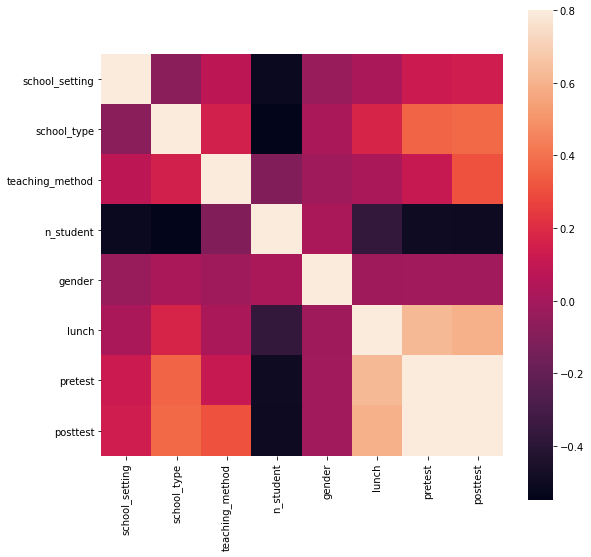

In [183]:
plt.figure(num=None,figsize=(9,9)),plt.rc('font',size=10)
sns.heatmap(data.corr(),vmax=0.8,square=True)

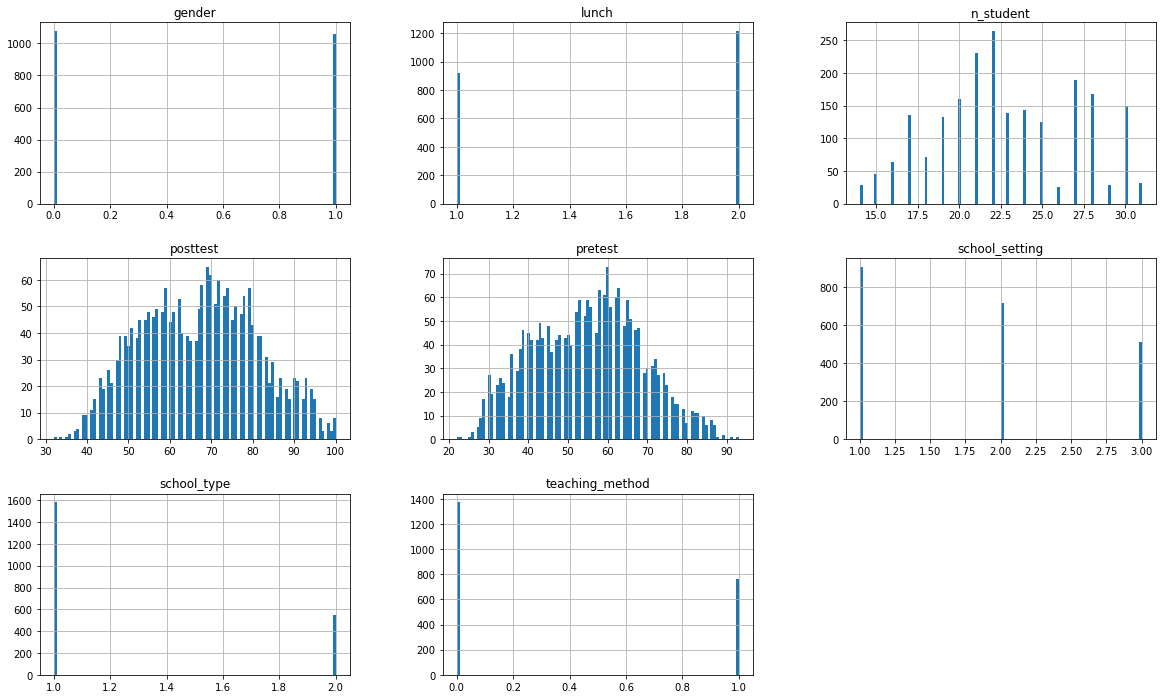

In [184]:
# Afficher les distributions des variables : data.hist()
data.hist(bins=100, figsize=(20,12))
plt.show()

In [185]:
import numpy as np
y= data['posttest']
x=data['pretest']

np.corrcoef(x,y)

array([[1.        , 0.95088429],
       [0.95088429, 1.        ]])

In [186]:
import statsmodels.api as sm

model = sm.OLS(x,y)
res = model.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                pretest   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          3.462e+05
Date:                Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                        21:06:12   Log-Likelihood:                         -6200.5
No. Observations:                2133   AIC:                                  1.240e+04
Df Residuals:                    2132   BIC:                                  1.241e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [187]:
pred = model.predict([62])
print(pred)
print(intercept)
print(slope)

[4464. 4898. 4712. ... 3162. 3286. 2976.]
-0.6801232361241745
0.10280912511759172


In [188]:
from scipy import stats
slope,intercept,r_value,p_value,std_error=stats.linregress(x,y)
def predict(x):
    return slope*x+intercept

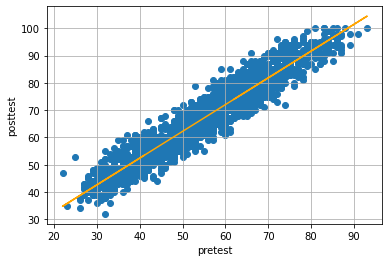

In [189]:
import matplotlib.pyplot as plt
 
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.xlabel('pretest')
plt.ylabel('posttest')
fitLine = predict(x)
plt.plot(x, fitLine, c='orange')
plt.scatter(x,y) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent
plt.show()

## <p style = "color:#3635cd"> Exercice 3 </p>


In [190]:
housing= pd.read_csv('housing.data.txt')
print("shape:", data.shape)
housing.head()

shape: (2133, 11)


,CIRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [191]:
# affichage d'informations statistiques sur les données numerique seulement, plage de variation
housing.describe()

,CIRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.716290,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,2.653510,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.250895,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,2.326718,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


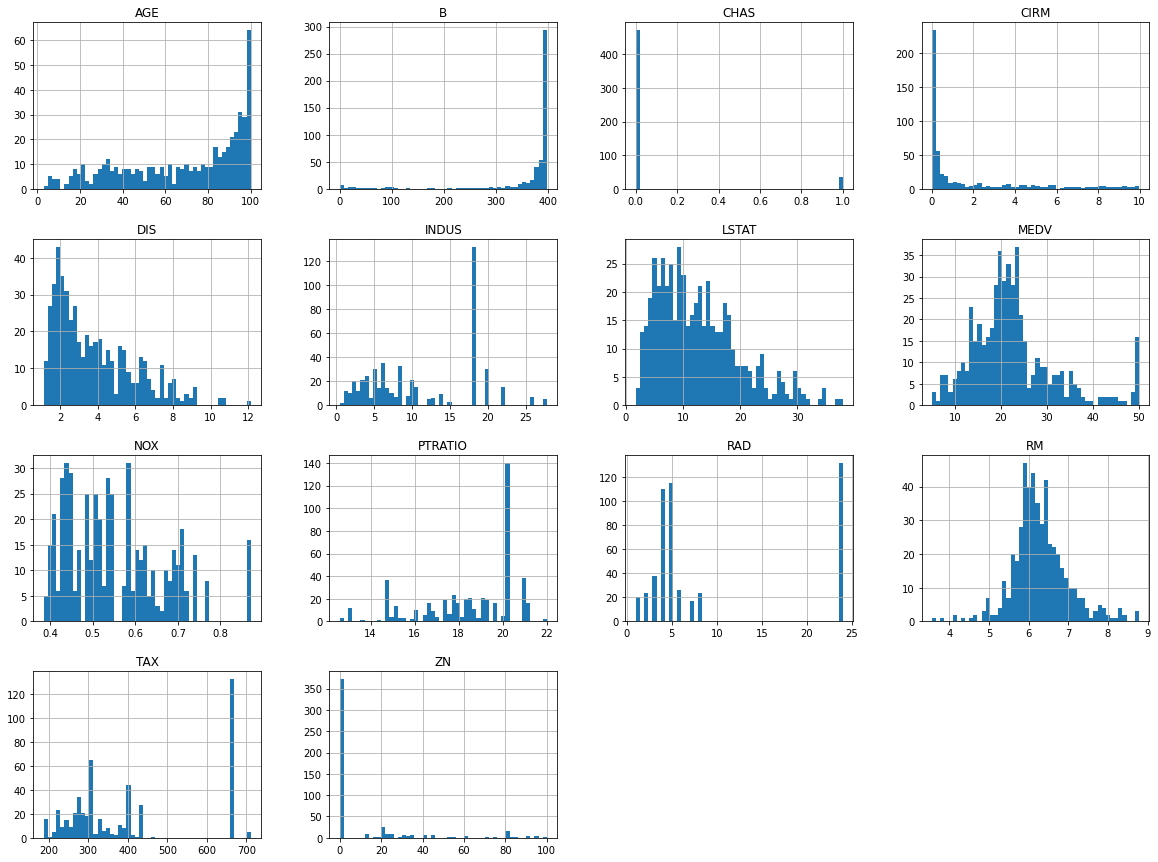

In [192]:
# Visualisation des histogrammes des variables numériques, distrbution des differents attributs (non symetrique)
housing.hist(bins=50,figsize=(20,15))
plt.show()

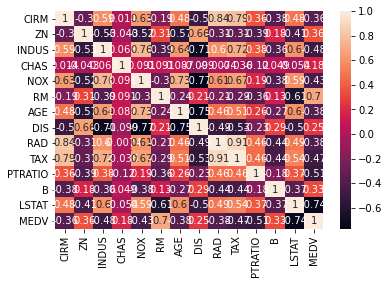

In [193]:
 #calculer le coefficient de corrélation de chaque paire de variables ==> matrice 10 x 10 symétrique
corr_matrix = housing.corr()
sns.heatmap(corr_matrix, annot=True)

In [194]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
CIRM      -0.362077
AGE       -0.376955
RAD       -0.381626
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

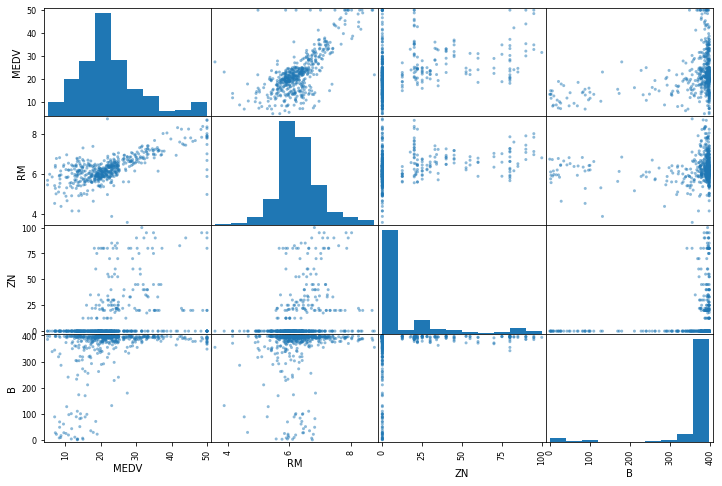

In [195]:
# Prenons les 3 premiers attibuts les plus corrélés avec 'MEDV'
from pandas.plotting import scatter_matrix
attributes = ['MEDV', 'RM', 'ZN', 'B']
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

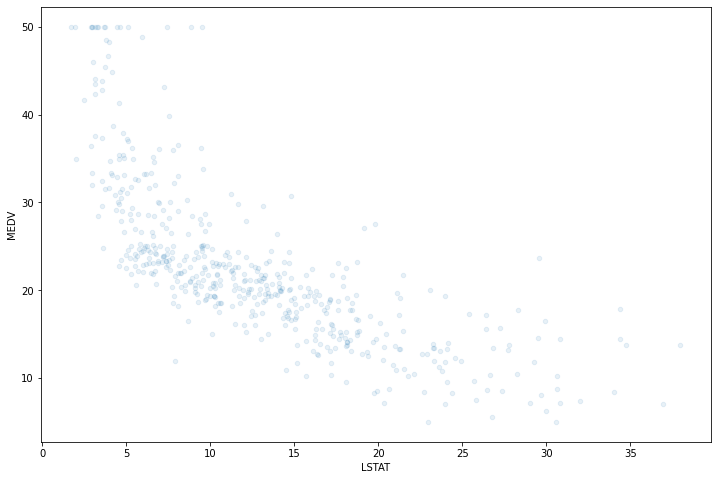

In [196]:
# ==> L'attribut le plus important dans la prédiction de `MEDV` est `lSTAT`(en valeur absolue)
housing.plot(kind='scatter', x='LSTAT', y='MEDV', figsize=(12,8), alpha=0.1)
plt.show()

In [197]:
#Supprimer les lignes dupliquées
housing = housing.drop_duplicates()

In [206]:
X = housing.drop("MEDV", axis=1) # input variables (X est une dataframe)
y = housing["MEDV"].to_numpy() # output variable (y est un vecteur)
print('X:', np.shape(X), 'y:', np.shape(y))

# Pour la séparation, on utilise la fonction train_test_split() de Scikit-Learn :
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.3,shuffle=True,random_state=22)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

X: (506, 13) y: (506,)


((354, 13), (152, 13), (354,), (152,))

In [209]:
#Model Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
#Création d'une instance par le constructeur LinearRegression()
lin_reg = LinearRegression()
#Apprentissage du modèle par la méthode fit(): Supervisée
lin_reg.fit(X_train,y_train)

#Prédiction des les données d'apprentissage X_train par la méthode .predict()
y_pred = lin_reg.predict(X_train)
#Evaluation de la prédiction obtenue avec les deux métriques R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_train,y_pred))
r2 = r2_score(y_train,y_pred)
print("Training : R2", r2 ,"et RMSE :" , rmse)

#Prédiction des les données des test X_test par la méthode .predict()
y_pred = lin_reg.predict(X_test)
#Evaluation de la prédiction obtenue avec les deux métriques R2 et RMSE
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2= r2_score(y_test,y_pred)
print("Testing : R2", r2 ,"et RMSE :" , rmse)

Training : R2 0.7243205129585508 et RMSE : 4.689057002428236
Testing : R2 0.7465447294386824 et RMSE : 4.9079100957699975


In [210]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
print(LinearRegression().get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


In [211]:
pipelines = []
params = []
names = []
# ajouter LinearRegression
pipelines.append(Pipeline([('clf', LinearRegression())])) ### LinearRegression
params.append({'clf__normalize':[True]})
names.append('LinearRegression')

In [213]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

def model(pipeline, parameters, name, X, y):    
    cv = KFold(n_splits=5, shuffle=True, random_state=32)
    grid_obj = GridSearchCV(estimator=pipeline, param_grid=parameters, cv=cv, scoring='r2', n_jobs=-1)
    grid_obj.fit(X,y)  
    print(name, 'R2:', grid_obj.best_score_)
    estimator = grid_obj.best_estimator_
    estimator.fit(X,y) # training sur tout training dataset
    return estimator 

estimators = []
for i in range(len(pipelines)):    
    estimators.append(model(pipelines[i], params[i], names[i], X_train, y_train))

LinearRegression R2: 0.6715605845889614


In [214]:
from sklearn.metrics import mean_squared_error, r2_score 
for i, estimator in enumerate(estimators):
    print('\nPerformance :', names[i])
    y_pred = estimator.predict(X_test)
    print('\n mean_squared_error :', mean_squared_error(y_test, y_pred))    
    print('\n r2_score :', r2_score(y_test, y_pred))


Performance : LinearRegression

 mean_squared_error : 24.08758150816097

 r2_score : 0.7465447294386836
